In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor 


In [2]:
calories = pd.read_csv("calories.csv")

In [3]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise_data = pd.read_csv("exercise.csv")

In [5]:
exercise_data.shape

(15000, 8)

In [6]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
#combining of two datasets

calories_data  = pd.concat([exercise_data, calories['Calories']], axis=1)

In [8]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [9]:
calories_data.shape

(15000, 9)

In [10]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [11]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [12]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

#### visualization

In [13]:
calories_data['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

C:\Users\Rapid IT World\AppData\Local\Temp\ipykernel_3764\1320807187.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(calories_data, x='Gender', palette='Set2')


<Axes: xlabel='Gender', ylabel='count'>

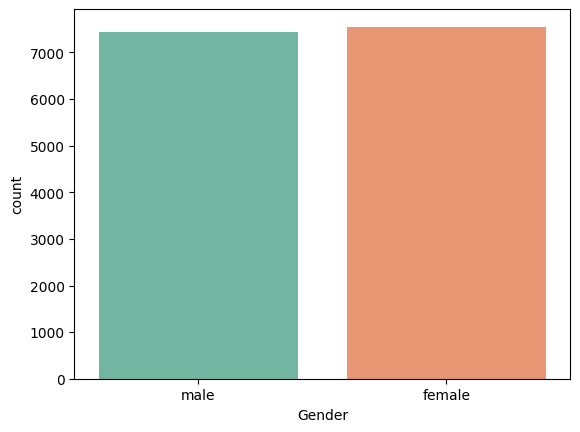

In [14]:
# ploting the gender column in count plot
sns.countplot(calories_data, x='Gender', palette='Set2')

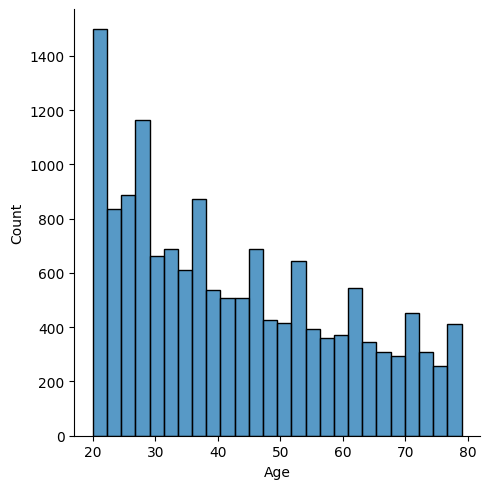

In [15]:
#distribution plot of age 
sns.displot(calories_data['Age'])

In [16]:
#Defining the necessary column for show the graph 
cols = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

C:\Users\Rapid IT World\AppData\Local\Temp\ipykernel_3764\204645393.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(calories_data, x=col, palette="set2", kde=True)
C:\Users\Rapid IT World\AppData\Local\Temp\ipykernel_3764\204645393.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(calories_data, x=col, palette="set2", kde=True)
C:\Users\Rapid IT World\AppData\Local\Temp\ipykernel_3764\204645393.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(calories_data, x=col, palette="set2", kde=True)
C:\Users\Rapid IT World\AppData\Local\Temp\ipykernel_3764\204645393.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(calories_data, x=col, palette="set2", kde=True)
C:\Users\Rapid IT World\AppData\Local\Temp\ipykernel_3764\204645393.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigne

<Figure size 600x400 with 0 Axes>

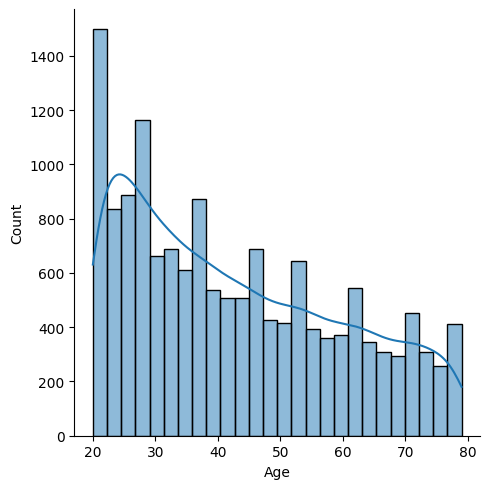

<Figure size 600x400 with 0 Axes>

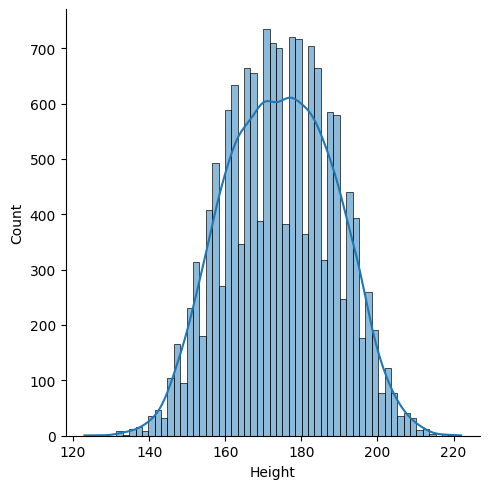

<Figure size 600x400 with 0 Axes>

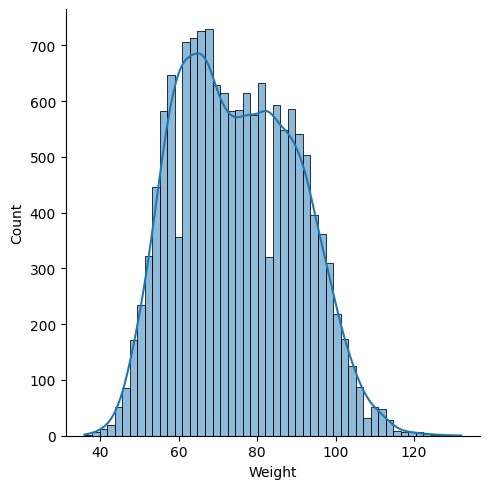

<Figure size 600x400 with 0 Axes>

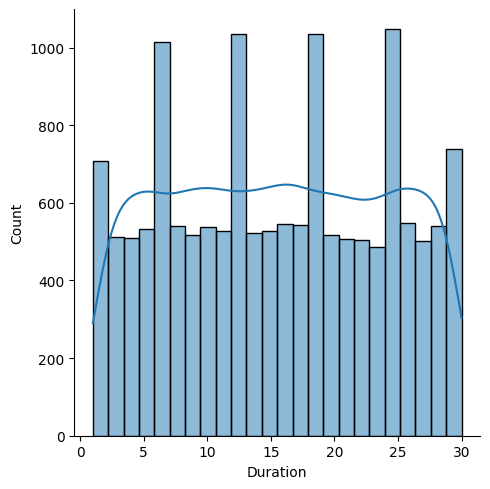

<Figure size 600x400 with 0 Axes>

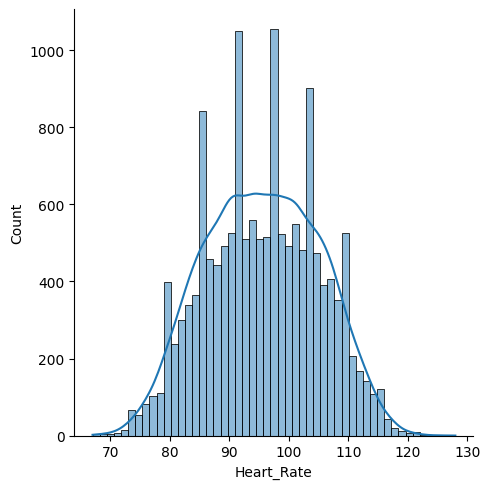

<Figure size 600x400 with 0 Axes>

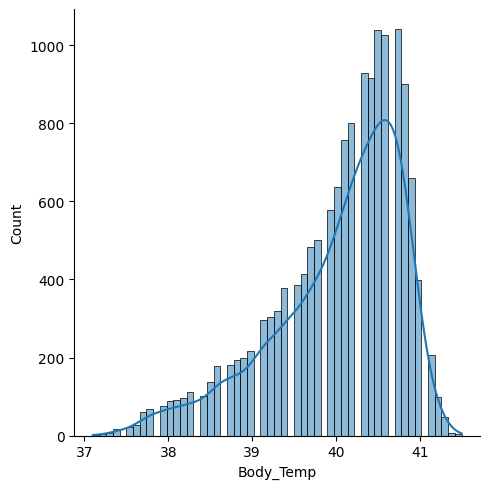

<Figure size 600x400 with 0 Axes>

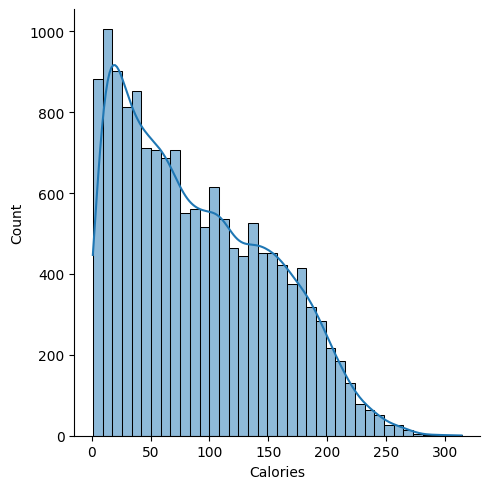

In [17]:
for col in cols:
    plt.figure(figsize=(6,4))
    sns.displot(calories_data, x=col, palette="set2", kde=True)


##### Correlaton in dataset

In [18]:

from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

In [20]:
#enconding of Gender into the numerica values like 0 --> female and 1--> male  
calories_data['Gender'] = le.fit_transform(calories_data['Gender'])

In [21]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [22]:
correlation = calories_data.corr()

In [23]:
correlation

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.000687,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Gender,-0.000687,1.000000,0.003222,0.710534,0.783186,0.003440,0.011555,0.007264,0.022357
Age,-0.001827,0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


<Axes: >

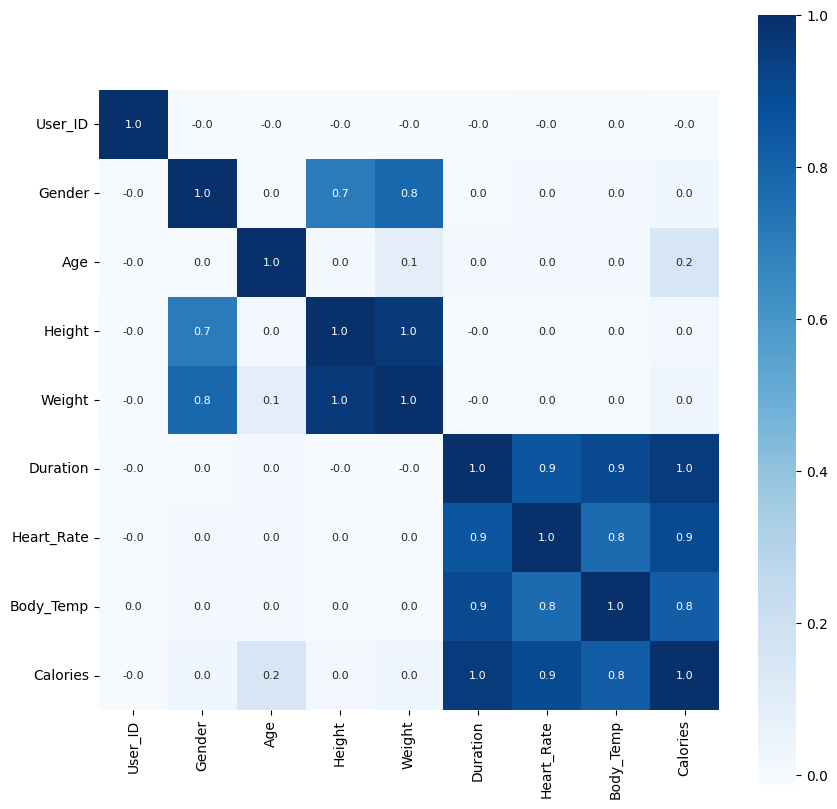

In [24]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8},cmap='Blues' )

In [25]:
#Seprating the independent and dependent column
X = calories_data.drop(['User_ID', 'Calories'], axis=1)
Y = calories_data['Calories']

In [26]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8


In [27]:
Y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [28]:
#spliting the data into training and testing data 
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)


In [29]:
print(X.shape ,x_train.shape, x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [30]:
calories_data.corr()['Calories'].sort_values(ascending=False)


Calories      1.000000
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Age           0.154395
Weight        0.035481
Gender        0.022357
Height        0.017537
User_ID      -0.001661
Name: Calories, dtype: float64

### Model Training 

In [31]:
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state = 3
)

In [32]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

#### training accuracy

In [33]:
train_pred = model.predict(x_train)

In [34]:
train_mae = metrics.mean_absolute_error(y_train, train_pred)

In [35]:
train_mae

0.9885423903918514

In [36]:
training_accuracy = metrics.r2_score(y_train, train_pred)

In [37]:
training_accuracy

0.9995397563972377

In [38]:
test_data_pred = model.predict(x_test)

In [39]:
test_data_pred

array([127.85443 , 221.39343 ,  37.325714, ..., 146.5104  ,  24.252163,
        89.22231 ], dtype=float32)

#### Mean absolute error

In [40]:
mae = metrics.mean_absolute_error(y_test, test_data_pred)

In [41]:
mae

1.1889899667898813

In [42]:
test_accuracy = metrics.r2_score(y_test,test_data_pred)

In [43]:
test_accuracy

0.9992425247433904

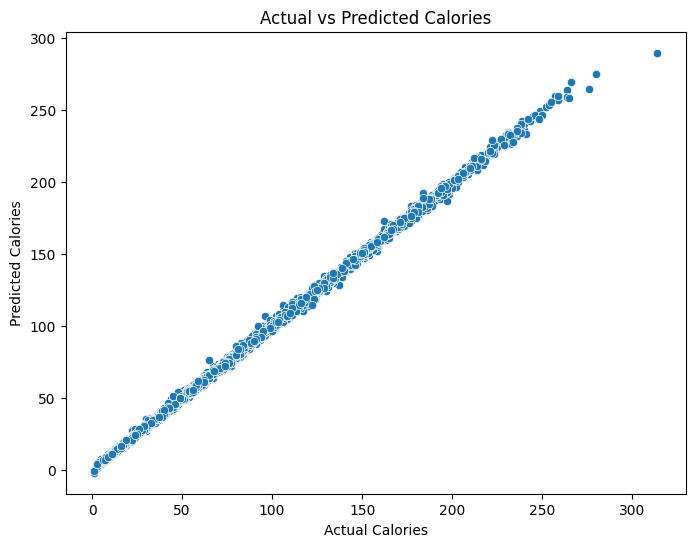

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=test_data_pred)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories")
plt.show()


In [45]:
# print(metrics.r2_score(external_input,predicted_calories ))

In [46]:
import numpy as np

external_input = np.array([[1, 25, 175, 70, 30, 120, 37.0]])  # 2D array
predicted_calories = model.predict(external_input)
print("Predicted Calories Burned:", predicted_calories[0])

Predicted Calories Burned: 234.41522


In [47]:
actual_calories = 240.0


In [48]:
mape = abs((predicted_calories[0] - actual_calories) / actual_calories) * 100
print("MAPE: {:.2f}%".format(mape))


MAPE: 2.33%


In [50]:
import  pickle

In [51]:
filename = "calories.sav"
pickle.dump(model,open(filename, 'wb'))